In [1]:
%load_ext autoreload
%autoreload 2
from paper import *
from animation import DynamicsAnimation

Connecting level 0 ...
Connecting level 1 ...
Connecting level 2 ...
Connecting level 3 ...
Connecting level 4 ...


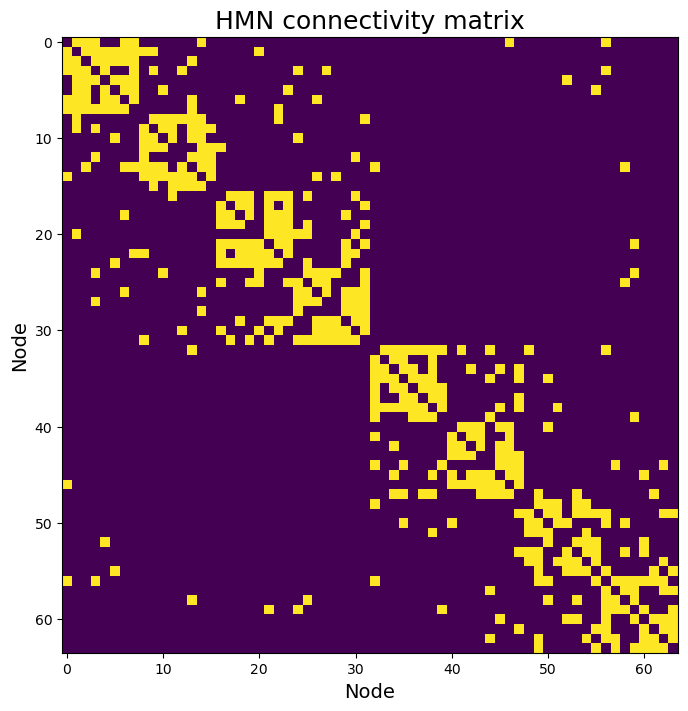

In [9]:
M0 = 4
levels = 4
alpha = 2.5

links = get_HMN(M0, levels, alpha)
# np.save("data/links", links)
# links = np.load("data/links.npy")
plot_HMN(links)

Kappa: 0.8


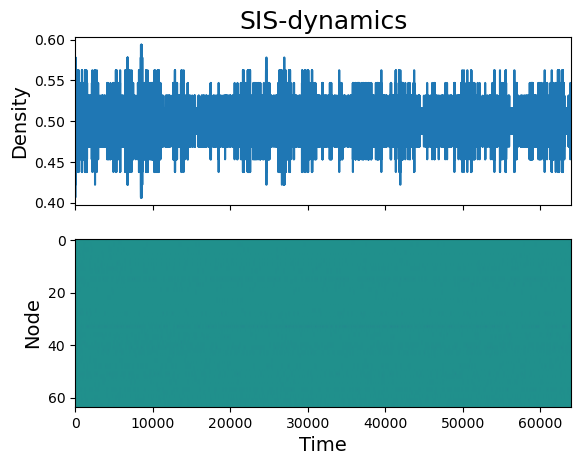

Kappa: 0.7000000000000001


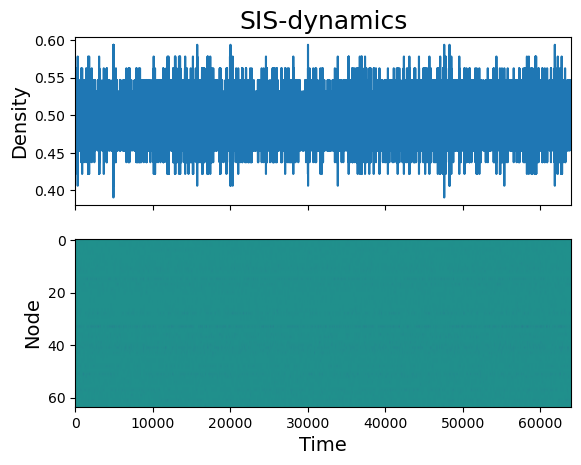

Kappa: 0.6


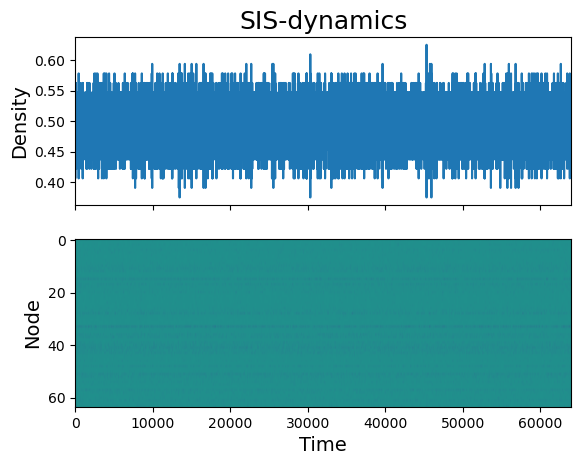

Kappa: 0.5


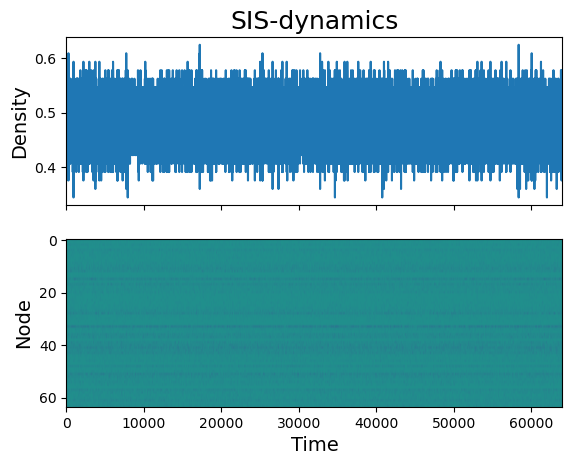

Kappa: 0.4


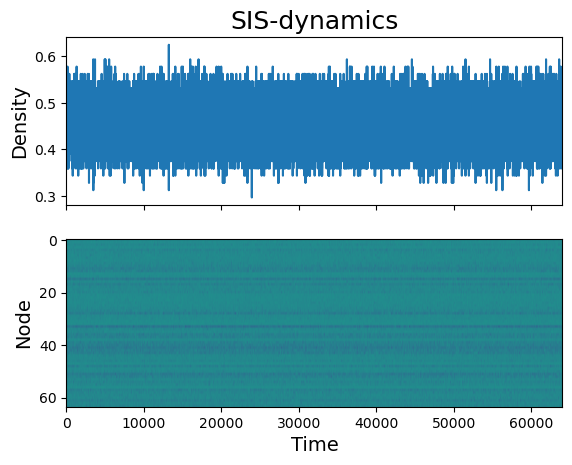

Kappa: 0.30000000000000004


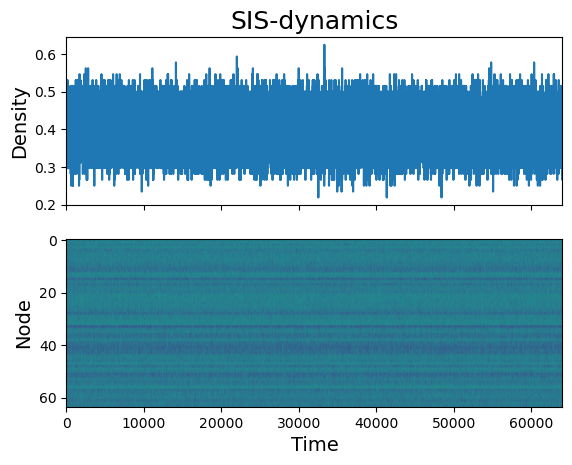

Kappa: 0.2


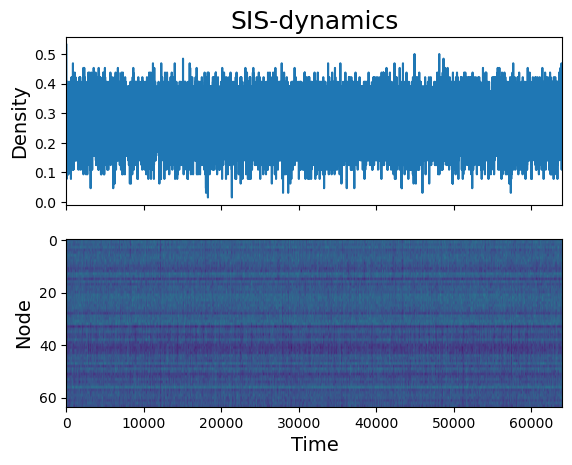

Kappa: 0.1


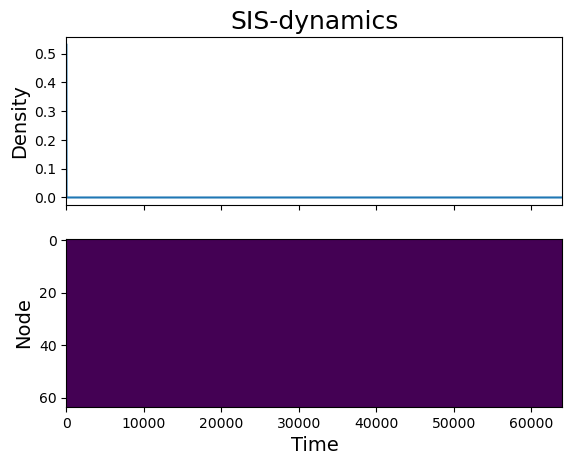

In [23]:
# Dynamics
# initial = np.ones(len(links), dtype=np.uint8)
initial = np.random.randint(0, 2, len(links), dtype=np.uint8)
T = int(len(links) * 1000)
for kappa in np.linspace()[::-1]:
    print(f"Kappa: {np.round(kappa, 4)}")
    data = run_dynamics(links, initial, T, kappa)
    plot_dynamics(data)

In [ ]:
num_rep = 1000
initials = np.random.randint(0, 2, size=(num_rep, len(links)), dtype=np.uint8)
a_vals = np.ones(num_rep, dtype=np.uint64) * 100
b_vals = np.ones(num_rep, dtype=np.uint64) * 500
intervals = np.stack([a_vals, b_vals], axis=1)
delta = 4
kappa = 0.8

C = get_mean_C(links, initials, num_rep, intervals, delta, kappa)
# C = np.load("data/C_k4.npy")
# np.save("data/C_k8", C)
# plot_FC(C)
# for kappa in np.arange(0.1, 0.9, 0.1)[::-1]:
#     print(f"Kappa: {kappa}")
#     data = run_dynamics(links, initials[0], 3 * len(links), kappa)
#     plot_dynamics(data)

In [ ]:
k4_C = np.load("data/C_k4.npy")
k8_C = np.load("data/C_k8.npy")

In [ ]:
theta_range = np.linspace(0.0, 1.0, 100)
k4_s1_vals = []
k4_g_vals = []
k8_s1_vals = []
k8_g_vals = []

for theta in tqdm(theta_range):
    k4_A = get_A(k4_C, theta)
    k4_s1, k4_g = get_s1_g(k4_A)
    k4_s1_vals.append(k4_s1)
    k4_g_vals.append(k4_g)

    k8_A = get_A(k8_C, theta)
    k8_s1, k8_g = get_s1_g(k8_A)
    k8_s1_vals.append(k8_s1)
    k8_g_vals.append(k8_g)

In [ ]:
N = M0 ** (levels+1)
plt.figure(figsize=(12, 8))

plt.scatter(theta_range, np.array(k4_s1_vals)/N, label="s1/N", marker="o", color="red")
plt.scatter(theta_range, np.array(k4_g_vals)/N, label="g/N", marker="s", color="blue")
plt.yscale("log")
plt.ylim(0.001, 1.0)
plt.title("s1/N and g/N over theta for kappa = 0.4", size=18)
plt.xlabel("theta", size=14)
plt.ylabel("order parameter", size=14)
plt.legend(fontsize=12)

plt.show()

plt.figure(figsize=(12, 8))

plt.scatter(theta_range, np.array(k8_s1_vals)/N, label="s1/N", marker="o", color="red")
plt.scatter(theta_range, np.array(k8_g_vals)/N, label="g/N", marker="s", color="blue")
plt.yscale("log")
plt.ylim(0.001, 1.0)
plt.title("s1/N and g/N over theta for kappa = 0.8", size=18)
plt.xlabel("theta", size=14)
plt.ylabel("order parameter", size=14)
plt.legend(fontsize=12)

plt.show()